In [1]:
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
matplotlib.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (15, 5)
# plt.rc_context(rc={'font.family': 'monospace', 
#                    'font.weight': 'bold', 
#                    'font.size': 10})

In [2]:
def resumetable(df):
    '''show dataframe summary'''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

# Import Data

In [3]:
df = pd.read_csv('book2.csv')
resumetable(df)

Dataset Shape: (4816, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,684,Leadership and Self-Deception: Getting Out of ...,The Success Principles(TM) - 10th Anniversary ...,How to Talk to Anyone: 92 Little Tricks for Bi...
1,author,object,887,431,The Arbinger Institute,Jack Canfield,Leil Lowndes
2,review_count,int64,0,591,1163,995,1444
3,overall_rating,float64,0,15,4.6,4.8,4.3
4,price,float64,0,363,8.99,14.96,9.99
5,editrial_review,object,1073,515,“Extraordinary . . . Five Stars.” \n —Business...,“A guide to how to lift your life to where it ...,"""The lost art of verbal communication may be r..."
6,review_rating,int64,0,5,1,5,5
7,reviewer_name,object,0,4052,Voracious Reader,MAURICE J RUBINO,Ben J.
8,review_title,object,0,4483,Not a good use of your time.,Chicken Soup for the Soul co-author shares his...,"Wonderful, however, not all relevant to a coll..."
9,review date,object,0,1601,8/26/2018,10/20/2015,9/28/2017


## Business Data Cleaning

In [8]:
df = pd.read_csv('Business-Page1 V2.csv')
# df = df[['book_name', 'Author', 'language', 'publisher', 'price',
#          'overall_rating', 'review_count', 'review rating', 'review_content', 'review date']]
df.head(3)

,web-scraper-order,web-scraper-start-url,book_link,book_link-href,review_link,review_link-href,review_content,book_name,Author,review_count,overall_rating,price,publisher,review date,review rating,language,ISBN,pages
0,1589170375-259609,https://www.amazon.com/s?i=stripbooks&bbn=1000...,The Compound Effect,https://www.amazon.com/Compound-Effect-Darren-...,See all reviews from the United States,https://www.amazon.com/Compound-Effect-Darren-...,A lot of folks who have rated low seem to want...,The Compound Effect,Darren Hardy,"3,332 ratings",4.8 out of 5,$12.39,Publisher: Vanguard Press; Csm edition (Octobe...,"Reviewed in the United States on December 2, 2015",5.0 out of 5 stars,Language: English,ISBN-10: 159315724X,NaN
1,1589168597-229894,https://www.amazon.com/s?i=stripbooks&bbn=1000...,12 Rules for Life: An Antidote to Chaos,https://www.amazon.com/12-Rules-Life-Antidote-...,See all reviews from the United States,https://www.amazon.com/12-Rules-Life-Antidote-...,Very good,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,"12,058 ratings",4.6 out of 5,$14.99,"Publisher: Penguin (May 2, 2019)","Reviewed in the United States on September 4, ...",5.0 out of 5 stars,Language: English,ISBN-10: 0141988517,NaN
2,1589172622-296551,https://www.amazon.com/s?i=stripbooks&bbn=1000...,Mindset: The New Psychology of Success,https://www.amazon.com/Mindset-Psychology-Caro...,See all reviews from the United States,https://www.amazon.com/Mindset-Psychology-Caro...,Seen people recommend Dwecks fixed/growth mind...,Mindset: The New Psychology of Success,Carol S. Dweck,"3,595 ratings",4.5 out of 5,$10.15,"Publisher: Ballantine Books; Reprint, Updated ...","Reviewed in the United States on August 20, 2015",1.0 out of 5 stars,Language: English,ISBN-10: 0345472322,NaN


In [158]:
df.dropna(inplace=True)
df['review_count'] = [i.split(' ')[0] for i in df['review_count']]
df['review_count'] = [i.replace(',', '') for i in df['review_count']]

df['price'] = [i.replace('$', '') for i in df['price']]

df['overall_rating'] = [i.split(' ')[0] for i in df['overall_rating']]

df['review rating'] = [i.split(' ')[0] for i in df['review rating']]

df['language'] = [i.split(':')[1] for i in df['language']]

df['publish_date'] = [i.split('(')[-1] for i in df['publisher']]
df['publish_date'] = [i.replace(')', '') for i in df['publish_date']]

df['publisher_name'] = [i.split(':')[1].split(';')[0].split('(')[0] for i in df['publisher']]
df.drop('publisher', axis=1, inplace=True)

df['review date'] = [i.split('on')[1] for i in df['review date']]

resumetable(df)

Dataset Shape: (91904, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,59,The Compound Effect,12 Rules for Life: An Antidote to Chaos,Mindset: The New Psychology of Success
1,Author,object,0,50,Darren Hardy,Jordan B. Peterson,Carol S. Dweck
2,language,object,0,2,English,English,English
3,price,object,0,56,12.39,14.99,10.15
4,overall_rating,object,0,8,4.8,4.6,4.5
5,review_count,object,0,59,3332,12058,3595
6,review rating,object,0,5,5.0,5.0,1.0
7,review_content,object,0,85845,A lot of folks who have rated low seem to want...,Very good,Seen people recommend Dwecks fixed/growth mind...
8,review date,object,0,6216,"December 2, 2015","September 4, 2018","August 20, 2015"
9,publish_date,object,0,58,"October 2, 2012","May 2, 2019","December 26, 2007"


In [159]:
df['price'] = pd.to_numeric(df['price'])
df['overall_rating'] = pd.to_numeric(df['overall_rating'])
df['review rating'] = pd.to_numeric(df['review rating'])
df['review_count']  = pd.to_numeric(df['review_count'])
df['publish_date']= pd.to_datetime(df['publish_date']) 
df['review date']= pd.to_datetime(df['review date']) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91904 entries, 0 to 96173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       91904 non-null  object        
 1   Author          91904 non-null  object        
 2   language        91904 non-null  object        
 3   price           91904 non-null  float64       
 4   overall_rating  91904 non-null  float64       
 5   review_count    91904 non-null  int64         
 6   review rating   91904 non-null  float64       
 7   review_content  91904 non-null  object        
 8   review date     91904 non-null  datetime64[ns]
 9   publish_date    91904 non-null  datetime64[ns]
 10  publisher_name  91904 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 8.4+ MB


In [160]:
df.rename(columns={"review rating": "review_rating", "review date": "review_date", 'Author':'author'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91904 entries, 0 to 96173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       91904 non-null  object        
 1   author          91904 non-null  object        
 2   language        91904 non-null  object        
 3   price           91904 non-null  float64       
 4   overall_rating  91904 non-null  float64       
 5   review_count    91904 non-null  int64         
 6   review_rating   91904 non-null  float64       
 7   review_content  91904 non-null  object        
 8   review_date     91904 non-null  datetime64[ns]
 9   publish_date    91904 non-null  datetime64[ns]
 10  publisher_name  91904 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 8.4+ MB


In [162]:
df.to_csv('Business_clean.csv', index=False)

df = pd.read_csv('Business_clean.csv',parse_dates=['review_date','publish_date'])
df.info()

## Children Data Cleaning

In [163]:
df = pd.read_csv('Children-Page1 V2.csv')
df = df[['book_name', 'Author', 'language', 'publisher', 'price',
         'overall_rating', 'review_count', 'review rating', 'review_content', 'review date']]
df.head(3)

,book_name,Author,language,publisher,price,overall_rating,review_count,review rating,review_content,review date
0,Kindergarten writing paper with lines for ABC ...,NaN,Language: English,"Publisher: Independently published (May 10, 2019)",$5.99,4.9 out of 5,434 ratings,5.0 out of 5 stars,Awesome writing paper for my kindergartener. W...,"Reviewed in the United States on February 10, ..."
1,School Zone - Get Ready for Kindergarten Workb...,NaN,Language: English,"Publisher: School Zone Publishing (May 14, 2017)",$9.89,4.8 out of 5,208 ratings,5.0 out of 5 stars,Got this for my granddaughters PreK graduation...,"Reviewed in the United States on June 19, 2019"
2,"I Am Confident, Brave & Beautiful: A Coloring ...",Hopscotch Girls,Language: English,Publisher: Hopscotch Girls; 32st edition (Nove...,$8.33,4.8 out of 5,"4,170 ratings",1.0 out of 5 stars,The book came with a giant spot where it had g...,"Reviewed in the United States on December 10, ..."


In [164]:
resumetable(df)

Dataset Shape: (109242, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,127,Kindergarten writing paper with lines for ABC ...,School Zone - Get Ready for Kindergarten Workb...,"I Am Confident, Brave & Beautiful: A Coloring ..."
1,Author,object,14353,71,NaN,NaN,Hopscotch Girls
2,language,object,26419,1,Language: English,Language: English,Language: English
3,publisher,object,38859,66,"Publisher: Independently published (May 10, 2019)","Publisher: School Zone Publishing (May 14, 2017)",Publisher: Hopscotch Girls; 32st edition (Nove...
4,price,object,0,98,$5.99,$9.89,$8.33
5,overall_rating,object,0,7,4.9 out of 5,4.8 out of 5,4.8 out of 5
6,review_count,object,0,125,434 ratings,208 ratings,"4,170 ratings"
7,review rating,object,0,5,5.0 out of 5 stars,5.0 out of 5 stars,1.0 out of 5 stars
8,review_content,object,5,100760,Awesome writing paper for my kindergartener. W...,Got this for my granddaughters PreK graduation...,The book came with a giant spot where it had g...
9,review date,object,0,6960,"Reviewed in the United States on February 10, ...","Reviewed in the United States on June 19, 2019","Reviewed in the United States on December 10, ..."


In [166]:
df.dropna(inplace=True)
df['review_count'] = [i.split(' ')[0] for i in df['review_count']]
df['review_count'] = [i.replace(',', '') for i in df['review_count']]

df['price'] = [i.replace('$', '') for i in df['price']]

df['overall_rating'] = [i.split(' ')[0] for i in df['overall_rating']]

df['review rating'] = [i.split(' ')[0] for i in df['review rating']]
df['language'] = [str(i).split(':')[1] for i in df['language']]

df['publish_date'] = [i.split('(')[-1] for i in df['publisher']]
df['publish_date'] = [i.replace(')', '') for i in df['publish_date']]

df['publisher_name'] = [i.split(':')[1].split(';')[0].split('(')[0] for i in df['publisher']]
df.drop('publisher', axis=1, inplace=True)

df['review date'] = [i.split('on')[1] for i in df['review date']]

resumetable(df)

Dataset Shape: (41025, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,33,"I Am Confident, Brave & Beautiful: A Coloring ...",The Outdoor Toddler Activity Book: 100+ Fun Ea...,Preschool Math Workbook for Toddlers Ages 2-4:...
1,Author,object,0,22,Hopscotch Girls,Krissy Bonning-Gould,Modern Kid Press
2,language,object,0,1,English,English,English
3,price,object,0,28,8.33,9.97,6.99
4,overall_rating,object,0,5,4.8,4.7,4.6
5,review_count,object,0,32,4170,96,526
6,review rating,object,0,5,1.0,5.0,5.0
7,review_content,object,0,38361,The book came with a giant spot where it had g...,This book has been such a great asset to our f...,My 3 year old loves this book for his homescho...
8,review date,object,0,6161,"December 10, 2019","May 16, 2019","March 22, 2020"
9,publish_date,object,0,33,"November 13, 2017","April 2, 2019","October 29, 2019"


In [167]:
df['price'] = pd.to_numeric(df['price'])
df['overall_rating'] = pd.to_numeric(df['overall_rating'])
df['review rating'] = pd.to_numeric(df['review rating'])
df['review_count']  = pd.to_numeric(df['review_count'])
df['publish_date']= pd.to_datetime(df['publish_date']) 
df['review date']= pd.to_datetime(df['review date']) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41025 entries, 2 to 98917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       41025 non-null  object        
 1   Author          41025 non-null  object        
 2   language        41025 non-null  object        
 3   price           41025 non-null  float64       
 4   overall_rating  41025 non-null  float64       
 5   review_count    41025 non-null  int64         
 6   review rating   41025 non-null  float64       
 7   review_content  41025 non-null  object        
 8   review date     41025 non-null  datetime64[ns]
 9   publish_date    41025 non-null  datetime64[ns]
 10  publisher_name  41025 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [168]:
df.rename(columns={"review rating": "review_rating", "review date": "review_date", 'Author':'author'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41025 entries, 2 to 98917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       41025 non-null  object        
 1   author          41025 non-null  object        
 2   language        41025 non-null  object        
 3   price           41025 non-null  float64       
 4   overall_rating  41025 non-null  float64       
 5   review_count    41025 non-null  int64         
 6   review_rating   41025 non-null  float64       
 7   review_content  41025 non-null  object        
 8   review_date     41025 non-null  datetime64[ns]
 9   publish_date    41025 non-null  datetime64[ns]
 10  publisher_name  41025 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 3.8+ MB


In [169]:
df.to_csv('Children_clean.csv', index=False)

df = pd.read_csv('Children_clean.csv',parse_dates=['review_date','publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       41025 non-null  object        
 1   author          41025 non-null  object        
 2   language        41025 non-null  object        
 3   price           41025 non-null  float64       
 4   overall_rating  41025 non-null  float64       
 5   review_count    41025 non-null  int64         
 6   review_rating   41025 non-null  float64       
 7   review_content  41025 non-null  object        
 8   review_date     41025 non-null  datetime64[ns]
 9   publish_date    41025 non-null  datetime64[ns]
 10  publisher_name  41025 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 3.4+ MB


## Humor Data Cleaning

In [170]:
df = pd.read_csv('Humor-Page1 V2.csv')
df = df[['book_name', 'Author', 'language', 'publisher', 'price',
         'overall_rating', 'review_count', 'review rating', 'review_content', 'review date']]
df.head(3)

,book_name,Author,language,publisher,price,overall_rating,review_count,review rating,review_content,review date
0,The Beauty of Horror 1: A GOREgeous Coloring Book,Alan Robert,Language: English,Publisher: IDW Publishing; Clr Csm edition (Oc...,$15.98,4.8 out of 5,"1,390 ratings",5.0 out of 5 stars,It's filled with just the right amount of beau...,"Reviewed in the United States on April 24, 2018"
1,Slaughterhouse-Five: A Novel (Modern Library 1...,Kurt Vonnegut,Language: English,Publisher: Dial Press Trade Paperback; Reissue...,$7.79,4.3 out of 5,"3,473 ratings",5.0 out of 5 stars,There is no doubt in my mind that Kurt Vonnegu...,"Reviewed in the United States on August 25, 2017"
2,Wacky Waving Inflatable Tube Guy (RP Minis),NaN,Language: English,"Publisher: RP Minis (October 2, 2018)",$7.99,4 out of 5,"4,319 ratings",2.0 out of 5 stars,Should have listened to the other reviews. I h...,"Reviewed in the United States on February 1, 2019"


In [172]:
resumetable(df)

Dataset Shape: (83618, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,128,The Beauty of Horror 1: A GOREgeous Coloring Book,Slaughterhouse-Five: A Novel (Modern Library 1...,Wacky Waving Inflatable Tube Guy (RP Minis)
1,Author,object,6798,87,Alan Robert,Kurt Vonnegut,NaN
2,language,object,8748,1,Language: English,Language: English,Language: English
3,publisher,object,408,120,Publisher: IDW Publishing; Clr Csm edition (Oc...,Publisher: Dial Press Trade Paperback; Reissue...,"Publisher: RP Minis (October 2, 2018)"
4,price,object,0,85,$15.98,$7.79,$7.99
5,overall_rating,object,0,12,4.8 out of 5,4.3 out of 5,4 out of 5
6,review_count,object,0,127,"1,390 ratings","3,473 ratings","4,319 ratings"
7,review rating,object,0,5,5.0 out of 5 stars,5.0 out of 5 stars,2.0 out of 5 stars
8,review_content,object,19,77966,It's filled with just the right amount of beau...,There is no doubt in my mind that Kurt Vonnegu...,Should have listened to the other reviews. I h...
9,review date,object,0,6090,"Reviewed in the United States on April 24, 2018","Reviewed in the United States on August 25, 2017","Reviewed in the United States on February 1, 2019"


In [173]:
df.dropna(inplace=True)
df['review_count'] = [i.split(' ')[0] for i in df['review_count']]
df['review_count'] = [i.replace(',', '') for i in df['review_count']]

df['price'] = [i.replace('$', '') for i in df['price']]

df['overall_rating'] = [i.split(' ')[0] for i in df['overall_rating']]

df['review rating'] = [i.split(' ')[0] for i in df['review rating']]
df['language'] = [str(i).split(':')[1] for i in df['language']]

df['publish_date'] = [i.split('(')[-1] for i in df['publisher']]
df['publish_date'] = [i.replace(')', '') for i in df['publish_date']]

df['publisher_name'] = [i.split(':')[1].split(';')[0].split('(')[0] for i in df['publisher']]
df.drop('publisher', axis=1, inplace=True)

df['review date'] = [i.split('on')[1] for i in df['review date']]

resumetable(df)

Dataset Shape: (68080, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,95,The Beauty of Horror 1: A GOREgeous Coloring Book,Slaughterhouse-Five: A Novel (Modern Library 1...,Slaughterhouse-Five: A Novel (Modern Library 1...
1,Author,object,0,83,Alan Robert,Kurt Vonnegut,Kurt Vonnegut
2,language,object,0,1,English,English,English
3,price,object,0,68,15.98,7.79,7.79
4,overall_rating,object,0,12,4.8,4.3,4.3
5,review_count,object,0,95,1390,3473,3473
6,review rating,object,0,5,5.0,5.0,5.0
7,review_content,object,0,64096,It's filled with just the right amount of beau...,There is no doubt in my mind that Kurt Vonnegu...,"Stumbling around for something good to read, I..."
8,review date,object,0,6070,"April 24, 2018","August 25, 2017","September 3, 2012"
9,publish_date,object,0,90,"October 4, 2016","January 12, 1999","January 12, 1999"


In [174]:
df['price'] = pd.to_numeric(df['price'])
df['overall_rating'] = pd.to_numeric(df['overall_rating'])
df['review rating'] = pd.to_numeric(df['review rating'])
df['review_count']  = pd.to_numeric(df['review_count'])
df['publish_date']= pd.to_datetime(df['publish_date']) 
df['review date']= pd.to_datetime(df['review date']) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68080 entries, 0 to 74461
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       68080 non-null  object        
 1   Author          68080 non-null  object        
 2   language        68080 non-null  object        
 3   price           68080 non-null  float64       
 4   overall_rating  68080 non-null  float64       
 5   review_count    68080 non-null  int64         
 6   review rating   68080 non-null  float64       
 7   review_content  68080 non-null  object        
 8   review date     68080 non-null  datetime64[ns]
 9   publish_date    68080 non-null  datetime64[ns]
 10  publisher_name  68080 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 6.2+ MB


In [175]:
df.rename(columns={"review rating": "review_rating", "review date": "review_date", 'Author':'author'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68080 entries, 0 to 74461
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       68080 non-null  object        
 1   author          68080 non-null  object        
 2   language        68080 non-null  object        
 3   price           68080 non-null  float64       
 4   overall_rating  68080 non-null  float64       
 5   review_count    68080 non-null  int64         
 6   review_rating   68080 non-null  float64       
 7   review_content  68080 non-null  object        
 8   review_date     68080 non-null  datetime64[ns]
 9   publish_date    68080 non-null  datetime64[ns]
 10  publisher_name  68080 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 6.2+ MB


In [176]:
df.to_csv('Humor_clean.csv', index=False)

df = pd.read_csv('Humor_clean.csv',parse_dates=['review_date','publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68080 entries, 0 to 68079
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   book_name       68080 non-null  object        
 1   author          68080 non-null  object        
 2   language        68080 non-null  object        
 3   price           68080 non-null  float64       
 4   overall_rating  68080 non-null  float64       
 5   review_count    68080 non-null  int64         
 6   review_rating   68080 non-null  float64       
 7   review_content  68080 non-null  object        
 8   review_date     68080 non-null  datetime64[ns]
 9   publish_date    68080 non-null  datetime64[ns]
 10  publisher_name  68080 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 5.7+ MB


# Data Visualization

## Box Plot to Detect Outliers by Category

In [177]:
resumetable(df)

Dataset Shape: (68080, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,book_name,object,0,95,The Beauty of Horror 1: A GOREgeous Coloring Book,Slaughterhouse-Five: A Novel (Modern Library 1...,Slaughterhouse-Five: A Novel (Modern Library 1...
1,author,object,0,83,Alan Robert,Kurt Vonnegut,Kurt Vonnegut
2,language,object,0,1,English,English,English
3,price,float64,0,68,15.98,7.79,7.79
4,overall_rating,float64,0,12,4.8,4.3,4.3
5,review_count,int64,0,95,1390,3473,3473
6,review_rating,float64,0,5,5,5,5
7,review_content,object,0,64096,It's filled with just the right amount of beau...,There is no doubt in my mind that Kurt Vonnegu...,"Stumbling around for something good to read, I..."
8,review_date,datetime64[ns],0,6070,2018-04-24 00:00:00,2017-08-25 00:00:00,2012-09-03 00:00:00
9,publish_date,datetime64[ns],0,89,2016-10-04 00:00:00,1999-01-12 00:00:00,1999-01-12 00:00:00


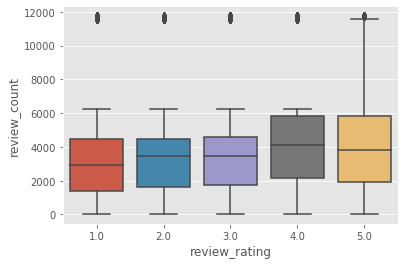

In [180]:
sns.boxplot(x='review_rating', y='review_count', data=df)

## Par

In [70]:
#print total revenue of three websites
df.groupby('Product Line')['Revenue'].sum()

Product Line
Boats.go.com      4736347.68
Cars.go.com      16757524.80
Planes.go.com    32529742.79
Name: Revenue, dtype: float64

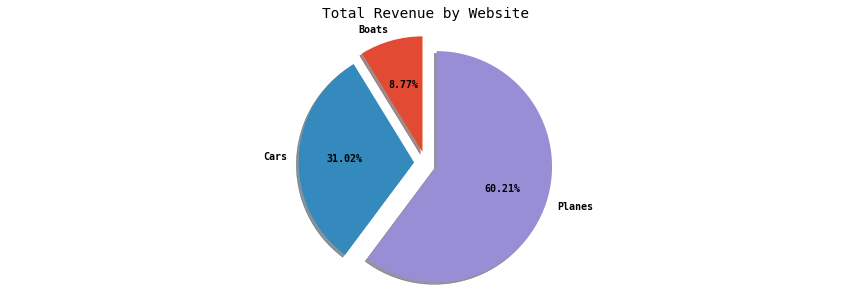

In [100]:
# Pie chart of total revenue:
labels = 'Boats', 'Cars','Planes'
sizes = [4736347.68, 16757524.80,32529742.79]
explode = (0.1, 0.1,0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Total Revenue by Website')
plt.show()

In [104]:
## split dataframe by category
df_cars = df[df['Product Line']=='Cars.go.com'].copy()
df_boats = df[df['Product Line']=='Boats.go.com'].copy()
df_planes = df[df['Product Line']=='Planes.go.com'].copy()

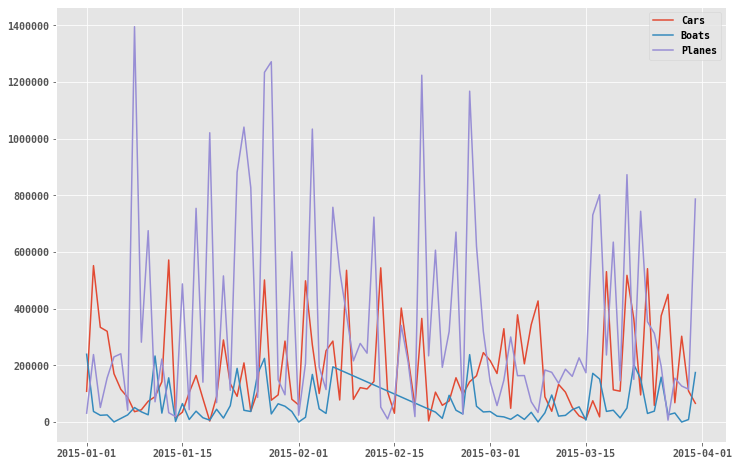

In [105]:
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(df_cars['Revenue'],label='Cars')
plt.plot(df_boats['Revenue'],label='Boats')
plt.plot(df_planes['Revenue'],label='Planes')
plt.legend()

- looks really messy at first glance without data manipulation
- there might be patterns when look individually

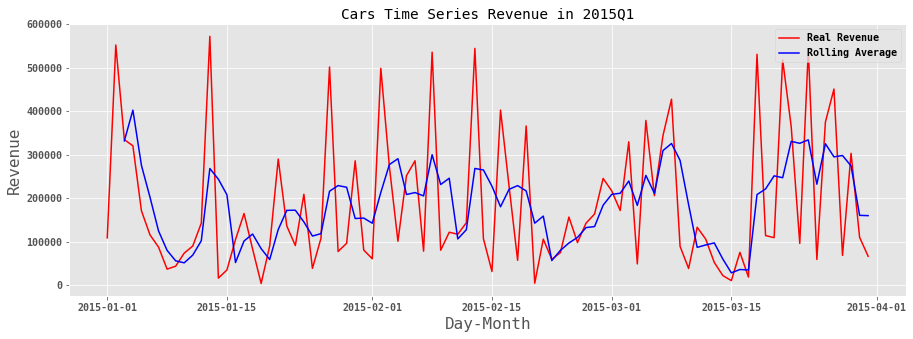

In [106]:
plt.plot(df_cars.Revenue,'r',df_cars.rolling(3).mean().Revenue,'b')
plt.title('Cars Time Series Revenue in 2015Q1')
plt.ylabel('Revenue', fontsize = 16)
plt.xlabel('Day-Month', fontsize = 16)
plt.legend(['Real Revenue','Rolling Average'], loc = 'upper right')
plt.show()

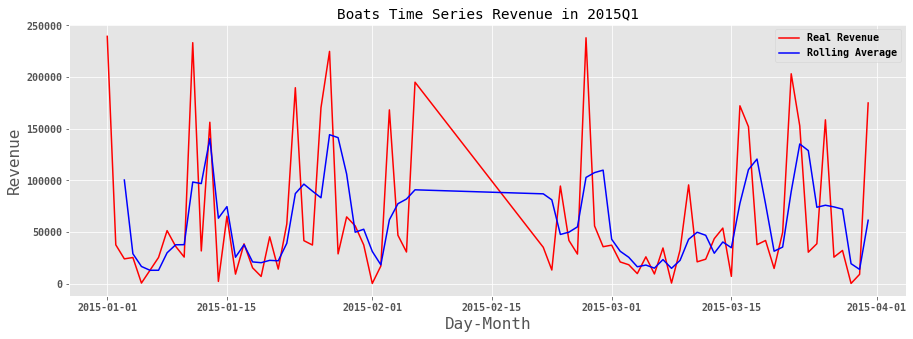

In [109]:
plt.plot(df_boats.Revenue,'r',df_boats.rolling(3).mean().Revenue,'b')
plt.title('Boats Time Series Revenue in 2015Q1')
plt.ylabel('Revenue', fontsize = 16)
plt.xlabel('Day-Month', fontsize = 16)
plt.legend(['Real Revenue','Rolling Average'], loc = 'upper right')
plt.show()

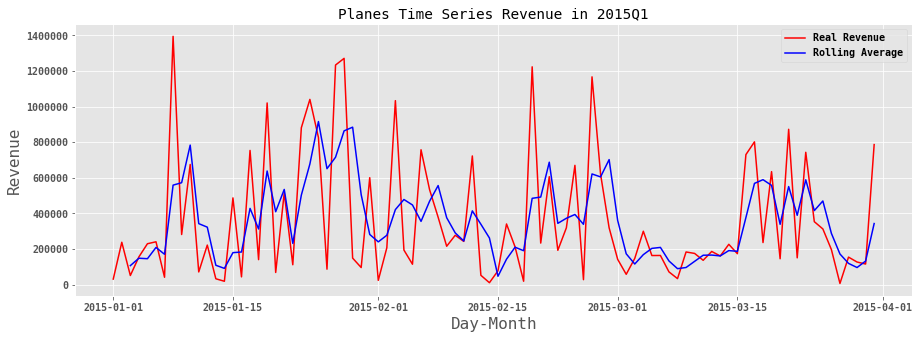

In [110]:
plt.plot(df_planes.Revenue,'r',df_planes.rolling(3).mean().Revenue,'b')
plt.title('Planes Time Series Revenue in 2015Q1')
plt.ylabel('Revenue', fontsize = 16)
plt.xlabel('Day-Month', fontsize = 16)
plt.legend(['Real Revenue','Rolling Average'], loc = 'upper right')
plt.show()


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [181]:
df['review_rating'].describe()

count    68080.000000
mean         4.459739
std          1.061330
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64

In [182]:
C= df['review_rating'].mean()
C

4.459738542890717

In [183]:
m= df['review_count'].quantile(0.9)
m

11592.0

In [185]:
q_movies = df[df['review_count'] >= m]
q_movies.shape

(9998, 11)

In [2]:
df = pd.read_csv('bookname.csv')
df.head()

,web-scraper-order,web-scraper-start-url,book_link,book_link-href,book_name,Author,review_count,overall_rating,price,publisher,language,ISBN,Editorial Reviews,star,reviewer name,review title,review date,content
0,1590360319-253,https://www.amazon.com/s?i=stripbooks&bbn=1000...,Throne of Glass Paperback Box Set,https://www.amazon.com/Throne-Glass-Paperback-...,Throne of Glass Paperback Box Set,Sarah J. Maas,87 ratings,4.6 out of 5,$67.97,Paperback: 5008 pages,"Publisher: Bloomsbury YA (November 5, 2019)",Language: English,Throne of Glass was Sarah J. Maas's first full...,5.0 out of 5 stars,Sarah Lukins,Tears of every kind,"Reviewed in the United States on April 15, 2020","Happy tears, sad tears, joyous tears, tears of..."
1,1590360193-116,https://www.amazon.com/s?i=stripbooks&bbn=1000...,American Royals,https://www.amazon.com/American-Royals-Kathari...,American Royals,Katharine McGee,514 ratings,4.4 out of 5,$8.79,Paperback: 464 pages,"Publisher: Ember; Reprint edition (May 5, 2020)",Language: English,"“With elegance, saucy secrets, and forbidden l...",5.0 out of 5 stars,Aryssa,Knocked Out of the Park,"Reviewed in the United States on September 10,...","Holy hell. Somehow, by the Grace of God, I got..."
2,1590360281-201,https://www.amazon.com/s?i=stripbooks&bbn=1000...,"How to Survive Anything: Shark Attack, Lightni...",https://www.amazon.com/How-Survive-Anything-Em...,"How to Survive Anything: Shark Attack, Lightni...",Rachel Buchholz,265 ratings,4.7 out of 5,$11.66,Paperback: 176 pages,Publisher: National Geographic Children's Book...,Language: English,Rachel Buchholz is the executive editor of Nat...,5.0 out of 5 stars,J.R.,What fun!,"Reviewed in the United States on December 8, 2019",My grandson will love this book! It even got ...
3,1590360324-260,https://www.amazon.com/s?i=stripbooks&bbn=1000...,The Ultimate Self-Esteem Workbook for Teens: O...,https://www.amazon.com/Ultimate-Self-Esteem-Wo...,The Ultimate Self-Esteem Workbook for Teens: O...,Megan MacCutcheon LPC,45 ratings,4.7 out of 5,$13.62,"Publisher: Althea Press (October 1, 2019)",Language: English,ISBN-10: 1641526106,“This workbook is a wonderful resource for tee...,5.0 out of 5 stars,tonia gelsinger,13 yr old daughter likes a lot,"Reviewed in the United States on April 16, 2020",13 yr old daughter likes a lot‘ writes and rea...
4,1590360145-61,https://www.amazon.com/s?i=stripbooks&bbn=1000...,The Injustice,https://www.amazon.com/Injustice-James-Patters...,The Injustice,James Patterson,354 ratings,4.4 out of 5,$7.99,"Publisher: jimmy patterson (November 13, 2018)",Language: English,ISBN-10: 0316478830,"Praise for The Injustice:\n\n""A Breakfast Club...",5.0 out of 5 stars,Amazon Customer,One more Patterson book for my library,"Reviewed in the United States on April 26, 2019",I like Patterson and his co writers


In [6]:
resumetable(df)

Dataset Shape: (280, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,web-scraper-order,object,0,280,1590360319-253,1590360193-116,1590360281-201
1,web-scraper-start-url,object,0,3,https://www.amazon.com/s?i=stripbooks&bbn=1000...,https://www.amazon.com/s?i=stripbooks&bbn=1000...,https://www.amazon.com/s?i=stripbooks&bbn=1000...
2,book_link,object,0,48,Throne of Glass Paperback Box Set,American Royals,"How to Survive Anything: Shark Attack, Lightni..."
3,book_link-href,object,0,48,https://www.amazon.com/Throne-Glass-Paperback-...,https://www.amazon.com/American-Royals-Kathari...,https://www.amazon.com/How-Survive-Anything-Em...
4,book_name,object,0,48,Throne of Glass Paperback Box Set,American Royals,"How to Survive Anything: Shark Attack, Lightni..."
5,Author,object,24,40,Sarah J. Maas,Katharine McGee,Rachel Buchholz
6,review_count,object,1,47,87 ratings,514 ratings,265 ratings
7,overall_rating,object,1,7,4.6 out of 5,4.4 out of 5,4.7 out of 5
8,price,object,0,43,$67.97,$8.79,$11.66
9,publisher,object,0,39,Paperback: 5008 pages,Paperback: 464 pages,Paperback: 176 pages
